In [ ]:
!pip install scvelo
!pip install cellrank


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 54.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.1/210.1 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.9 MB/s eta 0:00:00
  Created wheel for loompy: filename=loompy-3.0.7-py3-none-any.whl size=52018 sha256=295a4ef7318addd6bcd15dcfe8323fedec464448c6eb40300c14393806e50ae2
  Stored in directory: /root/.cache/pip/wheels/2c/22/1f/792a

In [ ]:
import cellrank as cr
import scanpy as sc
import scvelo as scv
import os
from google.colab import drive
drive.mount('/content/drive')

cr.settings.verbosity = 2
sc.settings.set_figure_params(frameon=False, dpi=100)

Mounted at /content/drive


In [ ]:
#os.chdir("/content/drive/MyDrive/meningioma_analysis")

adata = sc.read_h5ad("data/objects/adata_men_annot.h5ad")
adata

AnnData object with n_obs × n_vars = 10335 × 23756
    obs: 'sample', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'S_score', 'G2M_score', 'phase', 'leiden', 'celltype', 'cDC1_score', 'cDC2_score', 'pDC_score', 'CD14_Mono_score', 'CD16_Mono_score', 'NK_score', 'NK_Proliferating_score', 'NK_CD56bright_score', 'Eryth_score', 'HSPC_score', 'ILC_score', 'Platelet_score', 'dnT_score', 'gdT_score', 'MAIT_score', 'Microglia_score', 'Plasmacell_score', 'Monocyte_score', 'Neutrophil_score', 'Macrophage_score', 'TAM_score', 'IL1B_Inflammatory_score', 'CXCR4_Inflammatory_score', 'C1Q_Immunosuppressive_score', 'Scavenger_Immunosuppressive_sco

In [ ]:
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=300, frameon=False, vector_friendly=True)

In [ ]:
mask = adata.obs["celltype"].str.contains("Macrophage|Monocyte", case=False, na=False)
adata = adata[mask].copy()


ValueError: Please run `sc.tl.embedding_density()` first and specify the correct key.

In [ ]:
print(adata.obs["celltype"].value_counts())


celltype
Macrophage 5    2246
Macrophage 1    1299
Monocyte 1      1212
Macrophage 6    1035
Macrophage 3     971
Macrophage 7     869
Macrophage 4     524
Macrophage 2     305
Monocyte 2       296
Name: count, dtype: int64


KeyError: 'spliced'

In [ ]:
myeloid_clusters = ['Macrophage 3',
                  'Macrophage 4', 'Macrophage 5', 'Macrophage 6',
                  'Monocyte 1', 'Monocyte 2', 'Mono/cDC', 'Mono/Macro']

# Subset the adata object to only include myeloid cells
adata_myeloid = adata[adata.obs['celltype'].isin(myeloid_clusters)].copy()

In [ ]:
adata_myeloid

AnnData object with n_obs × n_vars = 9100 × 24218
    obs: 'sample', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'leiden', 'doublet_score', 'predicted_doublet', 'B_intermediate_score', 'B_memory_score', 'B_naive_score', 'Plasmacell_score', 'CD4_CTL_score', 'CD4_Naive_score', 'CD4_TCM_score', 'CD4_TEM_score', 'Treg_score', 'CD8_Naive_score', 'CD8_TCM_score', 'CD8_TEM_score', 'ASDC_score', 'cDC_score', 'pDC_score', 'CD14_Mono_score', 'CD16_Mono_score', 'NK_score', 'Monocyte_score', 'NK_CD56bright_score', 'ILC_score', 'gdT_score', 'MAIT_score', 'Microglia_score', 'Neutrophil_score', 'Macrophage_score', 'TAM_score', 'T_cel

In [ ]:
adata.layers["spliced"] = adata.X
adata.layers["unspliced"] = adata.X
scv.pp.moments(adata,n_pcs=None, n_neighbors=None)

or is corrupted (e.g. due to subsetting). Consider recomputing with `pp.neighbors`.
computing moments based on connectivities
    finished (0:00:08) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [ ]:
from cellrank.kernels import CytoTRACEKernel

ctk = CytoTRACEKernel(adata).compute_cytotrace()

Computing CytoTRACE score with `23756` genes
Adding `adata.obs['ct_score']`
       `adata.obs['ct_pseudotime']`
       `adata.obs['ct_num_exp_genes']`
       `adata.var['ct_gene_corr']`
       `adata.var['ct_correlates']`
       `adata.uns['ct_params']`
    Finish (0:00:01)


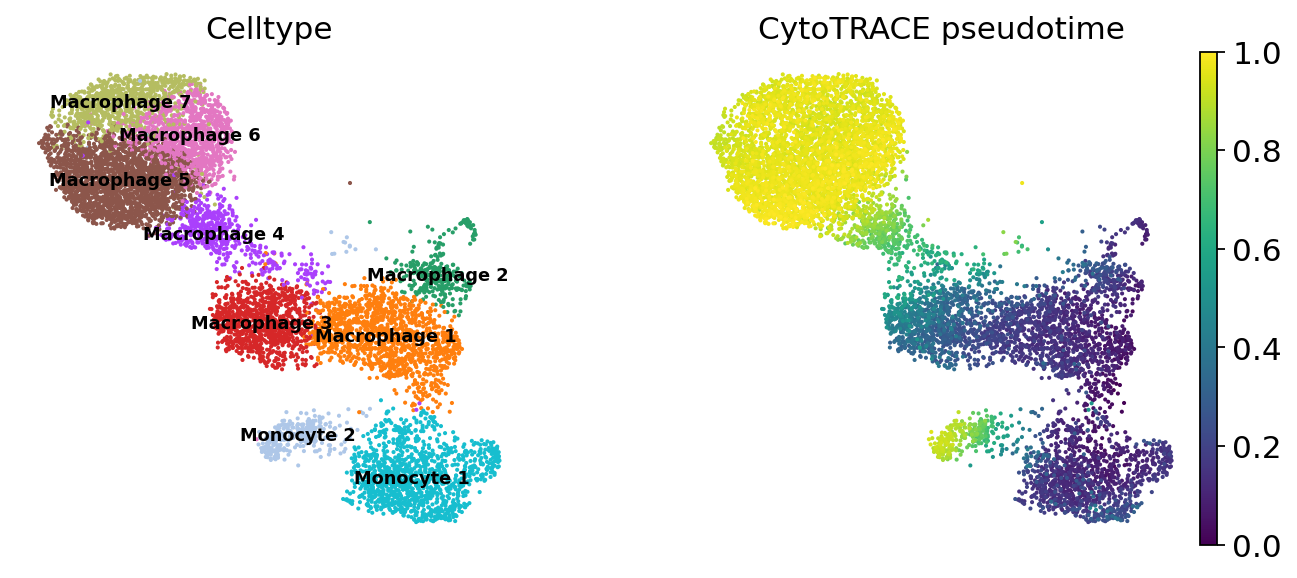

In [ ]:
sc.pl.embedding(
    adata,
    color=[ "celltype", "ct_pseudotime"],
    title=[ "Celltype","CytoTRACE pseudotime"],
    basis="umap",
    legend_loc="on data",
    legend_fontsize=8,
    frameon=False,

    color_map="viridis",
    save="_celltype_pseudotime.png"


)

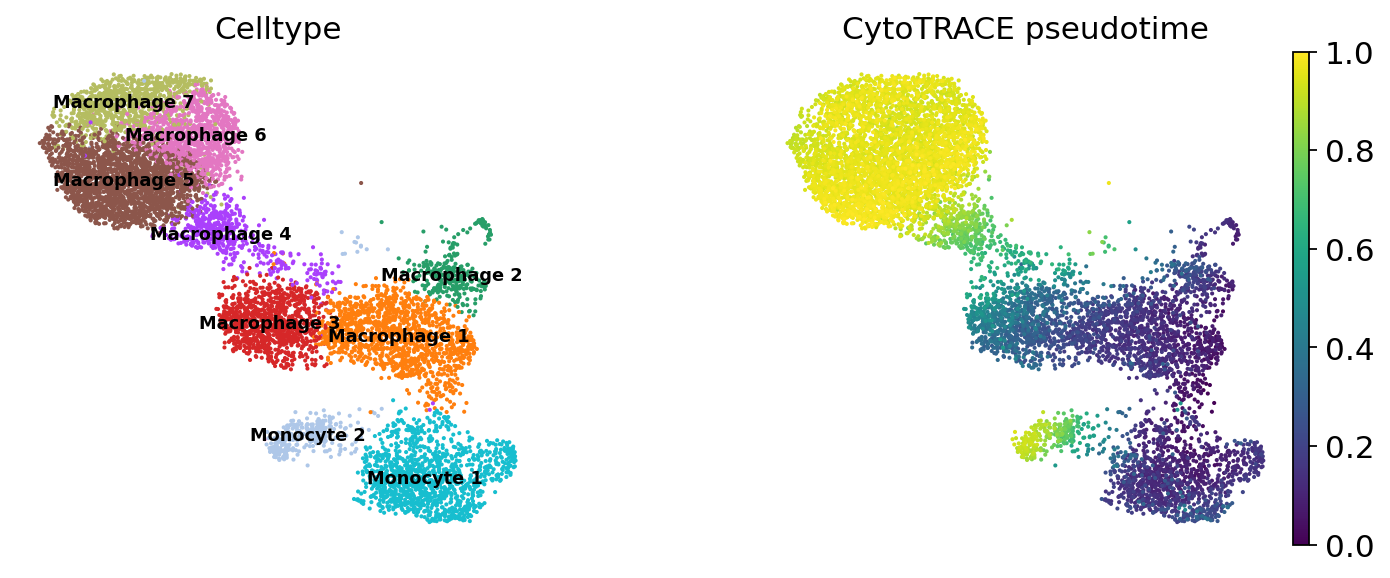

In [ ]:
import matplotlib.pyplot as plt
sc.pl.embedding(
    adata,
    color=["celltype", "ct_pseudotime"],
    title=["Celltype", "CytoTRACE pseudotime"],
    basis="umap",
    legend_loc="on data",
    legend_fontsize=8,
    frameon=False,
    color_map="viridis",
    wspace=0.3,           # Reduce horizontal space between plots
    ncols=2,             # Force 2 columns
    return_fig=True      # Return the figure object so you can modify it further if needed
)

# Optional: make even tighter with tight_layout
plt.tight_layout()

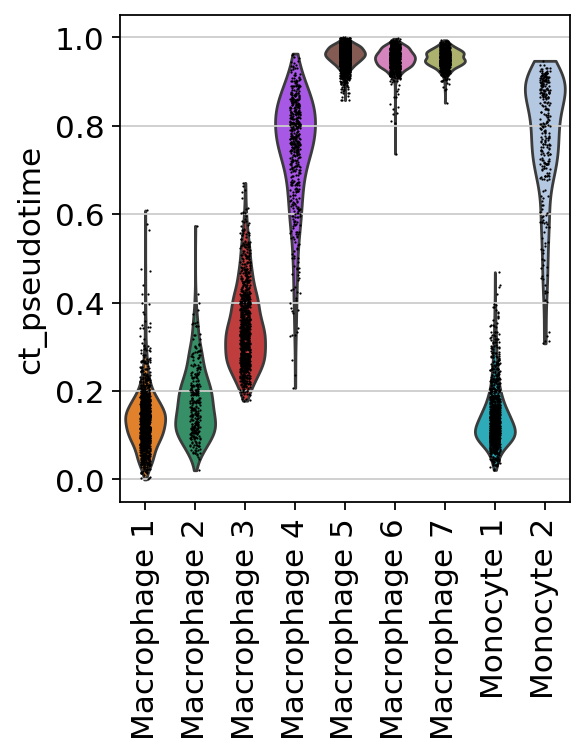

In [ ]:
sc.pl.violin(adata, keys=["ct_pseudotime"], groupby="celltype", rotation=90,save="_pseudotime_violin.png")
